# Predicting the people who have survived the titanic disaster based on the data points provided. 

In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
%matplotlib inline

### Ingesting the files containing the information of each person on titanic.

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
result_df = pd.read_csv('results.csv')

In [3]:
test_df = test_df.merge(result_df,on='PassengerId')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Checking for null values in the data provided

In [5]:
train_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [6]:
test_df.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
Survived       False
dtype: bool

### Putting the dataframes into a list so that they can be handled together.

In [7]:
combine = [train_df, test_df]

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Checking how the different factors affect survivability of the person on titanic

In [9]:
train_df[['Pclass','Survived']].groupby('Pclass', as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[['Sex','Survived']].groupby('Sex', as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df[['SibSp','Survived']].groupby('SibSp', as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df[['Parch','Survived']].groupby('Parch', as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


#### As we can see from data above, higher the Pclass.. more is the chance of survival.. same for having sex as female and having more relatives in titanic.

#### Visualising the data and seeing how various factors together impact survivability 

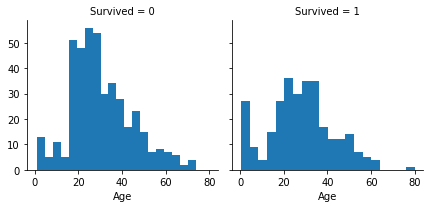

In [13]:
grid = sns.FacetGrid(train_df,col='Survived')
grid.map(plt.hist,'Age',bins=20)
grid.add_legend()

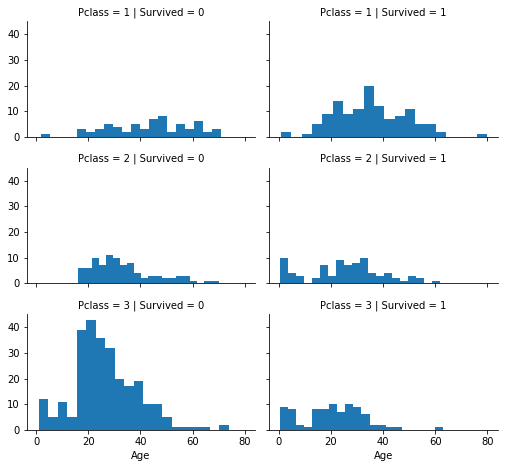

In [14]:
grid = sns.FacetGrid(train_df,col='Survived',row='Pclass',height=2.2,aspect=1.6)
grid.map(plt.hist,'Age',bins=20)
grid.add_legend()

C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


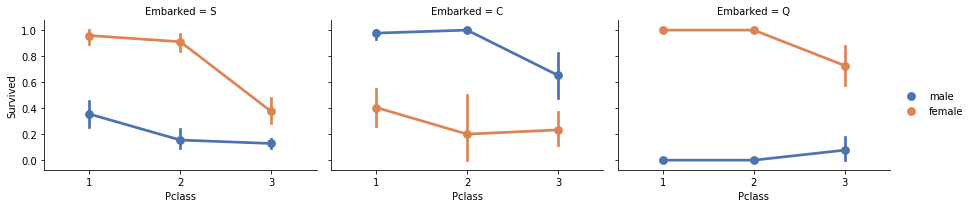

In [15]:
grid = sns.FacetGrid(train_df,col='Embarked',height=3,aspect=1.4)
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


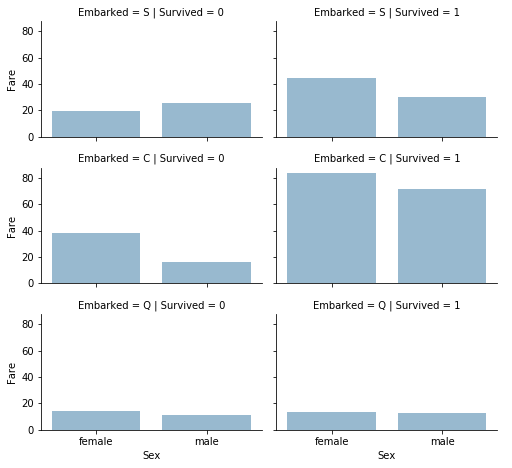

In [16]:
grid = sns.FacetGrid(train_df,col='Survived',row='Embarked',height=2.2,aspect=1.6)
grid.map(sns.barplot,'Sex','Fare',alpha=0.5,ci=None)
grid.add_legend()

#### As cabin and ticket number are of no use in determining the survival rate of person, so droping those columns.

In [17]:
train_df.drop(['Ticket','Cabin'],axis=1,inplace=True)
test_df.drop(['Ticket','Cabin'],axis=1,inplace=True)
combine = [train_df,test_df]
train_df.shape, test_df.shape

((891, 10), (418, 10))

#### Getting the  different titles out of names and checking how are they impacting survivability of person on titanic.

In [18]:
for data in combine:
    data['Title'] = data.Name.str.extract('([A-Za-z]+)\.',expand=False)
pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


#### Combing the different titles to lower the number of uniques.

In [19]:
for data in combine:
    data['Title'] = data['Title'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Major','Lady','Rev','Sir'],'Rare')
    data['Title'] = data['Title'].replace('Mlle','Miss')
    data['Title'] = data['Title'].replace('Ms','Miss')
    data['Title'] = data['Title'].replace('Mme','Mrs')

train_df[['Title','Survived']].groupby('Title', as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


#### Converting the titles to dummy values:
    Master : 1
    Miss   : 2
    Mrs    : 3
    Mr     : 4
    Rare   : 5

In [20]:
mapping = {'Master':1,'Miss':2,'Mrs':3,'Mr':4,'Rare':5}
for data in combine:
    data['Title'] = data['Title'].map(mapping)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,4


##### Checking if there is any NAN values in titles and filling it by visual inspection

In [21]:
test_df.Title.isnull().any()

True

In [22]:
test_df[test_df['Title'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9,C,1,NaN


In [23]:
test_df['Title'] = test_df['Title'].fillna(5)
test_df.Title.isnull().any()

False

#### Dropping the Name and PassengerId as they have no impact on survivability or useful information.

In [24]:
train_df.drop(['Name','PassengerId'],axis=1,inplace=True)
test_df.drop(['Name','PassengerId'],axis=1,inplace=True)
combine = [train_df,test_df]

#### Converting the sex to dummy values:
    Male   : 0
    Female : 1

In [25]:
mapping = {'male':0,'female':1}
for data in combine:
    data['Sex'] = data['Sex'].map(mapping).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,4
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,4


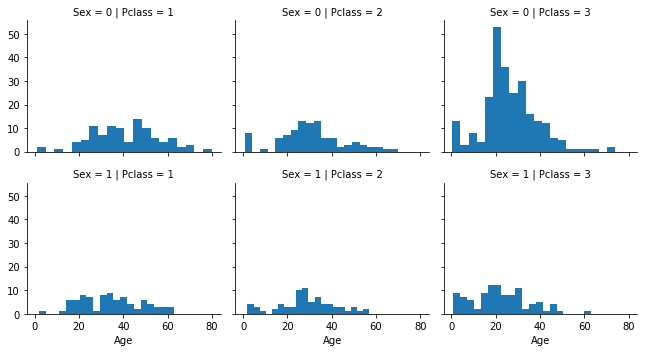

In [26]:
grid = sns.FacetGrid(train_df,row='Sex',col='Pclass',height=2.5,aspect=1.2)
grid.map(plt.hist,'Age',bins=20)
grid.add_legend()

#### Checking for nan values in Age column and filling it by taking median age of people with same Pclass and sex

In [27]:
nan = train_df['Age'].isnull().sum() + test_df['Age'].isnull().sum()
nan

263

In [28]:
guess_ages = np.zeros((2,3))
for data in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = data[(data['Sex']==i) & (data['Pclass']==j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            guess_ages[i,j] = int(age_guess + 0.5)
    
    for i in range(0,2):
        for j in range(0,3):
            data.loc[(data.Age.isnull()) & (data.Sex==i) & (data.Pclass==j+1),'Age'] = guess_ages[i,j]
    data['Age'] = data['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,4
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,4


#### Creating Age Bandsa and checking how it impacts Survivability  

In [29]:
train_df['AgeBand'] = pd.cut(train_df.Age,7)
train_df[['AgeBand','Survived']].groupby('AgeBand',as_index=False).mean()

,AgeBand,Survived
0,"(-0.08, 11.429]",0.573529
1,"(11.429, 22.857]",0.409756
2,"(22.857, 34.286]",0.314448
3,"(34.286, 45.714]",0.426829
4,"(45.714, 57.143]",0.411765
5,"(57.143, 68.571]",0.346154
6,"(68.571, 80.0]",0.142857


#### Creating Dummy Values for Age attribute based on bands created

In [30]:
for data in combine:
    data.loc[data.Age<=11,'Age'] = 0
    data.loc[(data.Age>11)&(data.Age<=22),'Age'] = 1
    data.loc[(data.Age>22)&(data.Age<=34),'Age'] = 2
    data.loc[(data.Age>34)&(data.Age<=45),'Age'] = 3
    data.loc[(data.Age>45)&(data.Age<=57),'Age'] = 4
    data.loc[(data.Age>57)&(data.Age<=68),'Age'] = 5
    data.loc[data.Age>68,'Age'] = 6
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,4,"(11.429, 22.857]"
1,1,1,1,3,1,0,71.2833,C,3,"(34.286, 45.714]"
2,1,3,1,2,0,0,7.9250,S,2,"(22.857, 34.286]"
3,1,1,1,3,1,0,53.1000,S,3,"(34.286, 45.714]"
4,0,3,0,3,0,0,8.0500,S,4,"(34.286, 45.714]"


#### Dropping AgeBand parameter

In [31]:
train_df.drop('AgeBand',axis=1,inplace=True)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,4
1,1,1,1,3,1,0,71.2833,C,3
2,1,3,1,2,0,0,7.9250,S,2
3,1,1,1,3,1,0,53.1000,S,3
4,0,3,0,3,0,0,8.0500,S,4


#### Creating new attribute FamilySize by adding Parch and SibSp together

In [32]:
for data in combine:
    data['FamilySize'] = data.Parch + data.SibSp

train_df[['FamilySize','Survived']].groupby('FamilySize', as_index=False).mean()

,FamilySize,Survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.200000
5,5,0.136364
6,6,0.333333
7,7,0.000000
8,10,0.000000


#### Joining Family Size more than 4 into one has above that it doesn't have much impact on survivability

In [33]:
for data in combine:
    data.loc[data.FamilySize>=4,'FamilySize'] = 4
train_df[['FamilySize','Survived']].groupby('FamilySize', as_index=False).mean()

,FamilySize,Survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.161290


#### Dropping Parch and SibSp attributes from the dataframe

In [34]:
train_df.drop(['Parch','SibSp'], axis=1, inplace=True)
test_df.drop(['Parch','SibSp'], axis=1, inplace=True)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,1,7.2500,S,4,1
1,1,1,1,3,71.2833,C,3,1
2,1,3,1,2,7.9250,S,2,0
3,1,1,1,3,53.1000,S,3,1
4,0,3,0,3,8.0500,S,4,0


#### Creating a new attribute by multiplying Age and Pclass

In [35]:
for data in combine:
    data['Age*Pclass'] = data.Age * data.Pclass
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,Age*Pclass
0,0,3,0,1,7.2500,S,4,1,3
1,1,1,1,3,71.2833,C,3,1,3
2,1,3,1,2,7.9250,S,2,0,6
3,1,1,1,3,53.1000,S,3,1,3
4,0,3,0,3,8.0500,S,4,0,9


#### Checking how fare paid by a person and embark parameter are correlated

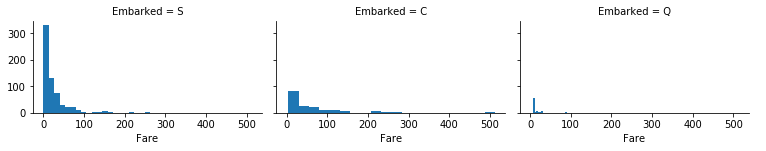

In [36]:
grid = sns.FacetGrid(train_df,col='Embarked', height=2.2, aspect=1.6)
grid.map(plt.hist,'Fare',bins=20)
grid.add_legend()

#### Checking the number of NAN values in embark parameter and filling it with the most common values as there are just 2 NAN values

In [37]:
train_df.Embarked.isnull().sum()

2

In [38]:
freq_port = train_df.Embarked.dropna().mode()[0]
train_df['Embarked'] = train_df.Embarked.fillna(freq_port)
train_df[['Embarked','Survived']].groupby('Embarked', as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


#### Creating dummy values for Embark parameter
    C : 0
    Q : 1
    S : 2

In [39]:
mapping = {'C':0,'Q':1,'S':2}
for data in combine:
    data['Embarked'] = data.Embarked.map(mapping).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,Age*Pclass
0,0,3,0,1,7.2500,2,4,1,3
1,1,1,1,3,71.2833,0,3,1,3
2,1,3,1,2,7.9250,2,2,0,6
3,1,1,1,3,53.1000,2,3,1,3
4,0,3,0,3,8.0500,2,4,0,9


#### Checking for NAN values in Fare and filling it with median value

In [40]:
test_df.Fare.isnull().sum()

1

In [41]:
test_df.Fare.fillna(test_df.Fare.dropna().median(),inplace=True)
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,Survived,Title,FamilySize,Age*Pclass
0,3,0,2,7.8292,1,0,4.0,0,6
1,3,1,4,7.0000,2,1,3.0,1,12
2,2,0,5,9.6875,1,0,4.0,0,10
3,3,0,2,8.6625,2,0,4.0,0,6
4,3,1,1,12.2875,2,1,3.0,2,3


#### Creating FareBand and checking how it is impacting survivability

In [42]:
train_df['FareBand'] = pd.qcut(train_df.Fare,4)
train_df[['FareBand','Survived',]].groupby('FareBand', as_index=False).mean()

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


#### Creating dummy values for Fare based on FareBand

In [43]:
for data in combine:
    data['Fare'] = data.loc[data.Fare<=7.91,'Fare'] = 0
    data['Fare'] = data.loc[(data.Fare>7.91)&(data.Fare<=14.454),'Fare'] = 1
    data['Fare'] = data.loc[(data.Fare>14.454)&(data.Fare<=31),'Fare'] = 2
    data['Fare'] = data.loc[data.Fare>31,'Fare'] = 3
    data['Fare'] = data.Fare.astype(int)

train_df.drop('FareBand',axis=1,inplace=True)
combine = [train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,Age*Pclass
0,0,3,0,1,3,2,4,1,3
1,1,1,1,3,3,0,3,1,3
2,1,3,1,2,3,2,2,0,6
3,1,1,1,3,3,2,3,1,3
4,0,3,0,3,3,2,4,0,9


#### Creating X_train, X_test, Y_train, Y_test

In [44]:
X_train = train_df.drop('Survived', axis=1)
Y_train = train_df.Survived
X_test = test_df.drop('Survived', axis=1)
Y_test = test_df.Survived
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((891, 8), (891,), (418, 8), (418,))

#### Creating function to measure models accuracy based on different accuracy  methods

In [45]:
def measure_model(X_train,Y_train,Y_test,Y_pred):
    measure1 = round(metrics.accuracy_score(Y_test,Y_pred)*100,2)
    measure2 = metrics.log_loss(Y_test,Y_pred)
    measure3 = metrics.f1_score(Y_test,Y_pred)
    return measure1, measure2, measure3

In [46]:
score,score1 = list(),list()

#### Logistic Regression Method

In [47]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
score1.append(round(logreg.score(X_train,Y_train)*100,2))
score += measure_model(X_train,Y_train,Y_test,Y_pred)
measure_model(X_train,Y_train,Y_test,Y_pred)

(91.87, 2.8094066760365473, 0.8881578947368421)

#### Support Vector Machine Method

In [48]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
score1.append(round(svc.score(X_train,Y_train)*100,2))
score += measure_model(X_train,Y_train,Y_test,Y_pred)
measure_model(X_train,Y_train,Y_test,Y_pred)

(92.58, 2.5615130693991004, 0.8963210702341137)

#### kNN method

In [49]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
score1.append(round(knn.score(X_train,Y_train)*100,2))
score += measure_model(X_train,Y_train,Y_test,Y_pred)
measure_model(X_train,Y_train,Y_test,Y_pred)

(85.41, 5.040399400048247, 0.7946127946127947)

#### Naive Bayes Method

In [50]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
score1.append(round(gaussian.score(X_train,Y_train)*100,2))
score += measure_model(X_train,Y_train,Y_test,Y_pred)
measure_model(X_train,Y_train,Y_test,Y_pred)

(88.04, 4.131516751273835, 0.8538011695906433)

#### Perceptron Method

In [51]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
score1.append(round(perceptron.score(X_train,Y_train)*100,2))
score += measure_model(X_train,Y_train,Y_test,Y_pred)
measure_model(X_train,Y_train,Y_test,Y_pred)

(81.58, 6.36255347227332, 0.7979002624671916)

#### Linear Support Vector Machine Method

In [52]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
score1.append(round(linear_svc.score(X_train,Y_train)*100,2))
score += measure_model(X_train,Y_train,Y_test,Y_pred)
measure_model(X_train,Y_train,Y_test,Y_pred)

C:\Users\Aditya\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(93.06, 2.3962634177242186, 0.9061488673139159)

#### Stochastic Gradient Decent Method

In [53]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
score1.append(round(sgd.score(X_train,Y_train)*100,2))
score += measure_model(X_train,Y_train,Y_test,Y_pred)
measure_model(X_train,Y_train,Y_test,Y_pred)

(64.83, 12.14669299252179, 0.6740576496674057)

#### Decision Tree Classification Method

In [54]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
score1.append(round(decision_tree.score(X_train,Y_train)*100,2))
score += measure_model(X_train,Y_train,Y_test,Y_pred)
measure_model(X_train,Y_train,Y_test,Y_pred)

(83.49, 5.701417135872899, 0.7509025270758123)

#### Random Forest Method

In [55]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
score1.append(round(random_forest.score(X_train,Y_train)*100,2))
score += measure_model(X_train,Y_train,Y_test,Y_pred)
measure_model(X_train,Y_train,Y_test,Y_pred)

(82.54, 6.031958523297934, 0.7574750830564784)

In [56]:
score2, score3, score4 = list(),list(),list()
for i in range(0,len(score),3):
    score2.append(score[i])
    score3.append(score[i+1])
    score4.append(score[i+2])

In [57]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines','KNN',
              'Naive Bayes', 'Perceptron','Linear SVC',
              'Stochastic Gradient Decent','Decision Tree','Random Forest',],
    'Log-Reg_Score': score1,
    'Accuracy_Score': score2,
    'Log-Loss Score': score3,
    'f1-Score': score4
})

In [58]:
models

,Model,Log-Reg_Score,Accuracy_Score,Log-Loss Score,f1-Score
0,Logistic Regression,82.04,91.87,2.809407,0.888158
1,Support Vector Machines,83.16,92.58,2.561513,0.896321
2,KNN,85.30,85.41,5.040399,0.794613
3,Naive Bayes,79.46,88.04,4.131517,0.853801
4,Perceptron,76.21,81.58,6.362553,0.797900
5,Linear SVC,82.15,93.06,2.396263,0.906149
6,Stochastic Gradient Decent,65.10,64.83,12.146693,0.674058
7,Decision Tree,86.76,83.49,5.701417,0.750903
8,Random Forest,86.76,82.54,6.031959,0.757475


### Based on different test, we can see that Logistic Regression method is better for these type of values.